In [1]:
import pandas as pd
import numpy as np

import statistics
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

In [51]:
market_data={}
stock_names=["NVDA","GOOGL","MSFT","EBAY","FB","TSLA","AMZN"]
file_names=['NVDA.csv','GOOGL.csv','MSFT.csv',"EBAY.csv","FB.csv","TSLA.csv","AMZN.csv"]
stocks_df=[pd.read_csv(i) for i in file_names]

for i in range(len(stocks_df)):
    stocks_df[i].columns = ["Unnamed","datestamp",'Open', 'High',"Low","Close","Volume","Adjusted"]
    stocks_df[i].name=stock_names[i]
    
    market_data[stock_names[i]]={
    'Open':[i for i in stocks_df[i]['Open']],
    'High':[i for i in stocks_df[i]['High']],
    'Low':[i for i in stocks_df[i]['Low']],
    'Close':[i for i in stocks_df[i]['Close']],
    "Volume":[i for i in stocks_df[i]['Volume']],
    "Adjusted":[i for i in stocks_df[i]['Adjusted']],
    "Date":[i for i in stocks_df[i]['datestamp']],
    "MA_10":[]
    }


In [40]:
for key,value in market_data.items():
    
    list1=market_data[key]["Close"]
    list2=[None if i in (0,1,2,3,4,5,6,7,8) else statistics.mean(list1[i-9:i+1]) for i   in range(0,len(list1))]
    market_data[key].update({"MA_10":list2})
    
for key,value in market_data.items():
    list3=market_data[key]["Adjusted"]
    list4=[0 if i==0 else (list3[i]-list3[i-1])/list3[i-1] for i in range(0,len(list3))]
    market_data[key]['DAILY_RETURN']=list4
    

In [41]:
def maximum_return():
    maxi=0
    for key,value in market_data.items():
        x=max(market_data[key]['DAILY_RETURN'])
        if x>maxi:
            maxi=x
            y=market_data[key]['DAILY_RETURN'].index(x)
            corresponding_date=market_data[key]['Date'][y]
        
    return [corresponding_date,maxi]
maximum_return()

['2015-07-17', 0.1625842688109545]

In [42]:
def minimum_return():
    mini=0
    for key,value in market_data.items():
        x=min(market_data[key]['DAILY_RETURN'])
        if x<mini:
            mini=x
            i=market_data[key]['DAILY_RETURN'].index(x)
            corresponding_date=market_data[key]['Date'][i]
        
    return [corresponding_date,mini]
minimum_return()

['2016-01-28', -0.12452691143073442]

In [43]:
def best_return_for_one_month():
    maxi=0
   
    for key,value in market_data.items():
        i=0
        
        while(i+30<len(market_data[key]['DAILY_RETURN'])):
            x=max(market_data[key]['DAILY_RETURN'][i:i+30])
           
            if x>maxi:
                maxi=x
                y=market_data[key]['DAILY_RETURN'].index(x)
                corresponding_date=market_data[key]['Date'][y]
            i=i+30
            
            
    z=datetime.strptime(corresponding_date,"%Y-%m-%d")
    result=str(z.month)+"/"+str(z.year)
    
        
    return [result,maxi]
best_return_for_one_month()

['7/2015', 0.1625842688109545]

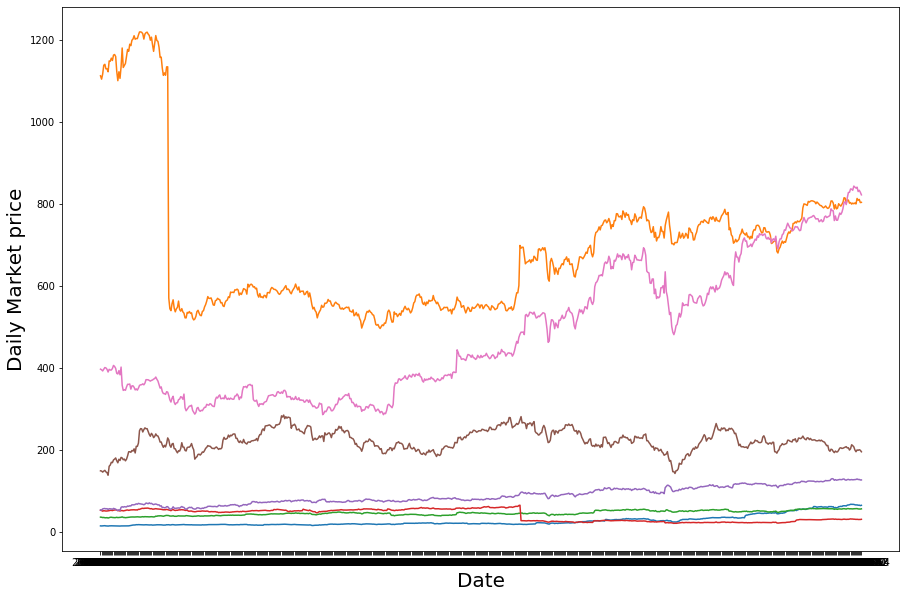

In [53]:
plt.figure(figsize=(15,10))
for key, value in market_data.items():
    plt.plot(market_data[key]['Date'],market_data[key]['Close'])
plt.xlabel("Date",fontsize=20)
plt.ylabel("Daily Market price",fontsize=20)
plt.show()